# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Jesús Armando Cañas Gamboa
*Métodos computacionales 2025-I*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [2]:
def myint(numero_bin):
    numero_bin = str(numero_bin) #Pasamos a cadena de texto
    numero_bin = list(numero_bin)#Pasamos a lista
    numero_bin.reverse()  # Voltiamos la lista para empezar desde el bit menos significativo
    numero_int = 0 #Inicializamos el acomulador de la suma 
    for i in range(len(numero_bin)):
        digito = int(numero_bin[i]) #Pasamos cada termino a entero
        numero_int += digito * (2 ** i) #Calculamos su correspondiente a decimal
    return numero_int #Retornamos


In [3]:
int(0b1000011100001)

4321

In [4]:
myint(1000011100001)

4321

# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [5]:
def number64(numero):
    # Validar que la cadena tenga 64 bits
    if len(numero) != 64:
        raise ValueError("Debe tener 64 bits exactos")

    # Extraer el bit de signo
    signo = int(numero[0])

    # Extraer los bits del exponente y calcular el valor real (restando el sesgo 1023)
    exponente_bin = numero[1:12]
    exponente = int(exponente_bin, 2) - 1023

    # Extraer la parte fraccionaria (mantisa)
    mantisa_bin = numero[12:]
    mantisa = 1  # El 1 que va antes del punto (bit oculto)
    
    # Sumar los bits de la fracción como potencias negativas de 2
    for i in range(len(mantisa_bin)):
        if mantisa_bin[i] == '1':
            mantisa += 2 ** (-(i + 1))

    # Calcular el valor final
    valor = (-1)**signo * mantisa * (2**exponente)
    return valor



In [6]:
number64('0100000000111011100100001111111111111111111111111111111111111111')

27.566406249999996

# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.
 
 

In [7]:
def arctan_1(x):
    """ 
    Esta función calcula el valor de la tangente inversa
    """
    #inicializamos el contador y el acomulador
    suma = 0
    i = 1
    while True:
        #Definimos la operación para cada termino
        p = 2*i-1
        termino = (-1)**(i+1) * (x**p)/p
        
        #Acumulamos
        suma+= termino

        #Definimos la tolerancia
        if abs(4*suma-math.pi)< 1e-3:
            break
        i+=1
    return suma


In [8]:
print(arctan_1(1))

0.7851481634599485


In [9]:
def arctan_2(x,tol):
    """ 
    Esta función calcula el valor de la tangente inversa
    entrada x valor del argumento
    salida tangente inversa y numero de iteraciones
    """
    #inicializamos el contador y el acomulador
    suma = 0
    i = 1
    while True:
        #Definimos la operación para cada termino
        p = 2*i-1
        termino = (-1)**(i+1) * (x**p)/p
        
        #Acumulamos
        suma+= termino
        
        #Definimos la tolerancia
        if abs(4*suma-np.pi)< tol:
            break
        i += 1
    return suma, i


In [10]:
print(arctan_2(1,1e-6))

(0.7853984133971936, 1000001)


In [11]:
def arctan_3(x,tolerancia):
    """ 
        Esta función calcula el valor de la tangente inversa
    entrada x valor del argumento
    salida tangente inversa y numero de iteraciones
    
    """
    
    if x ==1:
        z = 1/2
        y = 1/3
    #inicializamos el contador y el acomulador  
    suma_1 = 0
    suma_2 = 0
    i = 1
    while True:
        #Definimos la operación para cada termino
        p = 2*i-1
        termino_1 = (-1)**(i+1) * (z**p)/p
        
        #Acumulamos
        suma_1+= termino_1
        
        #Definimos la operación para cada termino
        p = 2*i-1
        termino_2 = (-1)**(i+1) * (y**p)/p
        
        #Acumulamos
        suma_2+= termino_2
        
        suma = suma_1+ suma_2
        
        #Definimos la tolerancia
        if abs(4*suma-math.pi)< tolerancia:
            break
        i+=1
    return suma,i

In [12]:
print(arctan_3(1,1e-3))

(0.7852126404402638, 4)


In [13]:
print(arctan_3(1,1e-6))

(0.7853982453336417, 9)


In [14]:
#comparacion de terminos


In [15]:
def arctan_4(x, tolerancia):
    """ 
    Esta función calcula el valor de la tangente inversa
    entrada x valor del argumento
    salida tangente inversa y numero de iteraciones
    """
    if x ==1:
        z = 1/5
        y = 1/239
    #inicializamos el contador y el acomulador
    suma_1 = 0
    suma_2 = 0
    i = 1
    while True:
        #Definimos la operación para cada termino
        p = 2*i-1
        termino_1 = (-1)**(i+1) * (z**p)/p
        
        #Acumulamos
        suma_1+= termino_1
        
        #Definimos la operación para cada termino
        p = 2*i-1
        termino_2 = (-1)**(i+1) * (y**p)/p
        
        #Acumulamos
        suma_2+= termino_2
        
        suma = 4*suma_1 - suma_2
        
        #Definimos la tolerancia
        if abs(4*suma-np.pi)< tolerancia:
            break
        i+=1
    return suma,i

In [16]:
def arctan_4(x, tolerancia):
    """ 
    Esta función calcula el valor de la tangente inversa
    entrada x valor del argumento
    salida tangente inversa y numero de iteraciones
    """
    if x ==1:
        z = 1/5
        y = 1/239
    #inicializamos el contador y el acomulador
    suma_1 = 0
    suma_2 = 0
    i = 1
    while True:
        #Definimos la operación para cada termino
        p = 2*i-1
        termino_1 = (-1)**(i+1) * (z**p)/p
        
        #Acumulamos
        suma_1+= termino_1
        
        #Definimos la operación para cada termino
        p = 2*i-1
        termino_2 = (-1)**(i+1) * (y**p)/p
        
        #Acumulamos
        suma_2+= termino_2
        
        suma = 4*suma_1 - suma_2
        
        #Definimos la tolerancia
        if abs(4*suma-np.pi)< tolerancia:
            break
        i+=1
    return suma,i

In [17]:
arctan_4(1,1e-3)

(0.7851492573315151, 2)

In [18]:
arctan_4(1,1e-6)

(0.7853979430455443, 4)

In [20]:
x , termino_1 = arctan_2(1,1e-6)
x , termino_2 = arctan_3(1,1e-6)
x , termino_3 = arctan_4(1,1e-6)

print(f'iteraciones\narcotangente metodo 1: {termino_1}\narcotangente metodo 2: {termino_2}\narcotangente metodo 3: {termino_3}')



iteraciones
arcotangente metodo 1: 1000001
arcotangente metodo 2: 9
arcotangente metodo 3: 4


# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [21]:
def exp(x, tol= 1e-7, N = 100): #Definimos la función
    
    Valor_de_la_serie = 0 #Inicializamos el acomulador

    for n in range(N): #Hacemos un ciclo que nos calcule la serie 
        #Calculamos el termino n-simo
        Termino = (-1)**n * (x)**n /math.factorial(n)
        #Miramos si cumple con la tolerancia
        if n> 1 and abs(Termino) <= abs(tol * Valor_de_la_serie):
            #Si cumple con la tolerancia retornamos el valor, le restamos porque estamos en el termino N+1
            return n-1, Valor_de_la_serie
        
        #Calculamos la sumas parciales
        Valor_de_la_serie+= Termino

        
    

In [22]:
N, valor = exp(1)
print(f'El numoero de iteraciones y el valor obtenido con la función es: {exp(1)}\n con un error de: {abs(1/np.exp(1) - valor)}.')

El numoero de iteraciones y el valor obtenido con la función es: (10, 0.3678794642857144)
 con un error de: 2.3114272051927287e-08.


In [23]:
def exp_2(x, tol= 1e-7, N = 100): #Definimos la función
    lista_terminos = []
    Valor_de_la_serie = 0 #Inicializamos el acomulador

    for n in range(N): #Hacemos un ciclo que nos calcule la serie 
        #Calculamos el termino n-simo
        Termino = (-1)**n * (x)**n /math.factorial(n)
        lista_terminos.append(Termino)
        #Miramos si cumple con la tolerancia
        if n> 1 and abs(Termino) <= abs(tol * Valor_de_la_serie):
            #Si cumple con la tolerancia retornamos el valor, le restamos porque estamos en el termino N+1
            return lista_terminos
        
        #Calculamos la sumas parciales
        Valor_de_la_serie+= Termino

        
    

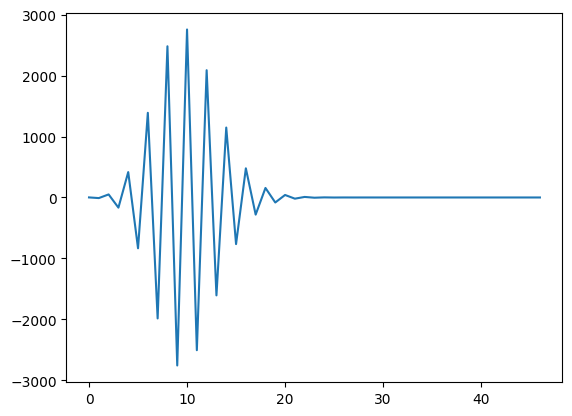

In [24]:
plt.plot(exp_2(9.9999999))

In [25]:
def exp_3(x, tol= 1e-7, N = 100): #Definimos la función
    lista_terminos = []
    Valor_de_la_serie = 0 #Inicializamos el acomulador

    for n in range(N): #Hacemos un ciclo que nos calcule la serie 
        #Calculamos el termino n-simo
        Termino = (x)**n /math.factorial(n)
        lista_terminos.append(Termino)
        #Miramos si cumple con la tolerancia
        if n> 1 and abs(Termino) <= abs(tol * Valor_de_la_serie):
            #Si cumple con la tolerancia retornamos el valor, le restamos porque estamos en el termino N+1
            return lista_terminos
        
        #Calculamos la sumas parciales
        Valor_de_la_serie+= Termino


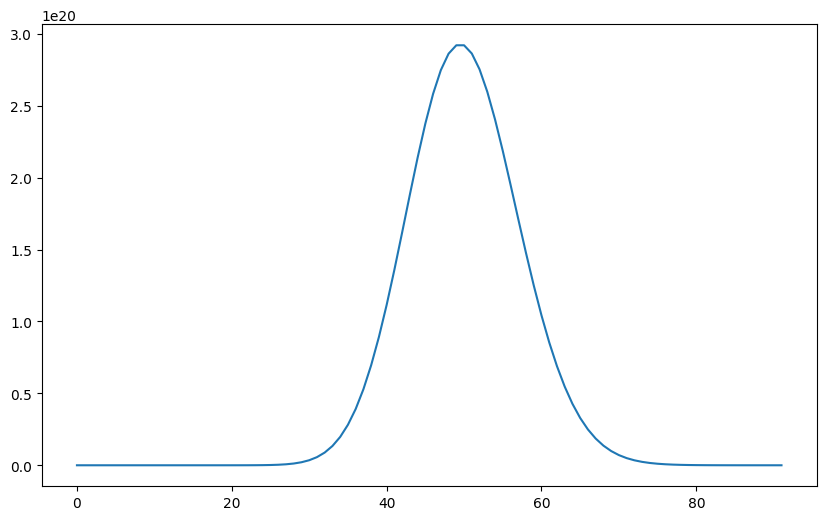

In [26]:
plt.figure(figsize = (10,6))
plt.plot(exp_3(50))

# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


In [27]:
f = lambda x : x*(x-1)

def derivada(x,f, landa):
    return (f(x + landa) - f(x) )/ landa

In [28]:
derivada(1,f,1e-2)

1.010000000000001

In [29]:
df = lambda x : 2*x-1

In [30]:
df(1)

1

In [31]:
delta = np.logspace(-14,-4,6)

In [33]:
derivadas = derivada(1,f,delta)

Text(0.5, 0, '$\\delta$')

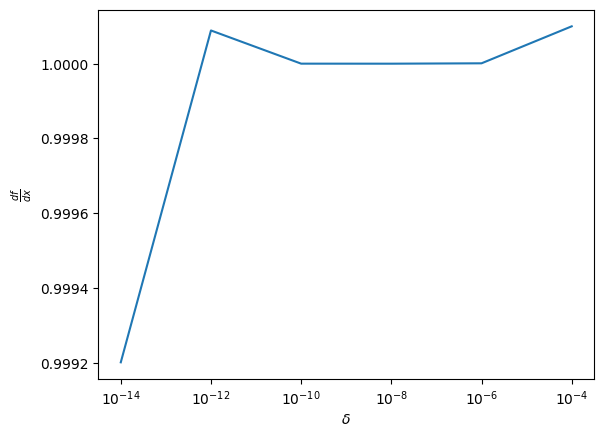

In [35]:
plt.plot(delta,derivadas)
plt.xscale('log')
plt.ylabel('$\\frac{df}{dx}$')
plt.xticks(delta)
plt.xlabel('$\\delta$')
